# Random Forest Regression

## Importing the libraries

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

## Importing the dataset

In [52]:
df = pd.read_csv('/content/weather.csv')

In [53]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [54]:
df.head()

,PRCP,TMAX,Year,Month,Day
0,0.01,81,2010,8,1
1,0.04,82,2010,8,2
2,0.00,84,2010,8,3
3,0.00,93,2010,8,4
4,1.03,95,2010,8,5


In [55]:
df.describe()

,PRCP,TMAX,Year,Month,Day
count,3806.000000,3806.000000,3806.000000,3806.000000,3806.000000
mean,0.121534,66.710720,2015.279296,6.662112,15.734367
std,0.343571,18.226884,3.014991,3.459375,8.803423
min,0.000000,15.000000,2010.000000,1.000000,1.000000
25%,0.000000,52.000000,2013.000000,4.000000,8.000000
50%,0.000000,69.000000,2015.000000,7.000000,16.000000
75%,0.050000,83.000000,2018.000000,10.000000,23.000000
max,5.020000,105.000000,2020.000000,12.000000,31.000000


In [56]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, 0].values

In [57]:
print(X.shape, y.shape) 

(3806, 4) (3806,)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3044, 4) (762, 4) (3044,) (762,)


## Training the Random Forest Regression model on the whole dataset

In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## Predicting a new result

In [61]:
yhat = regressor.predict(X_test)

## Visualising the Random Forest Regression results

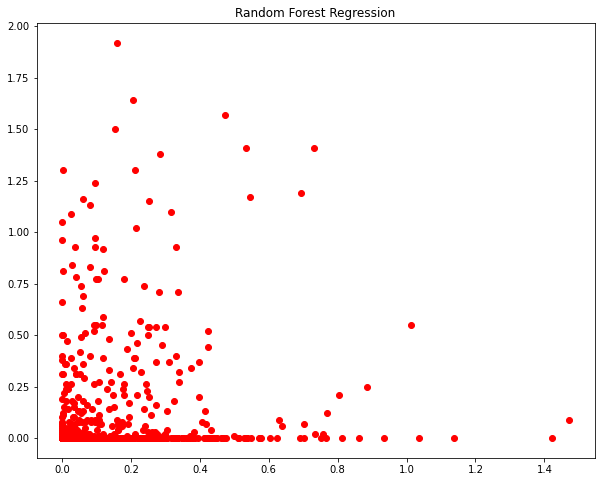

In [62]:
plt.scatter(yhat, y_test, color = 'red')
plt.title('Random Forest Regression')
plt.gcf().set_size_inches(10,8)
plt.show()

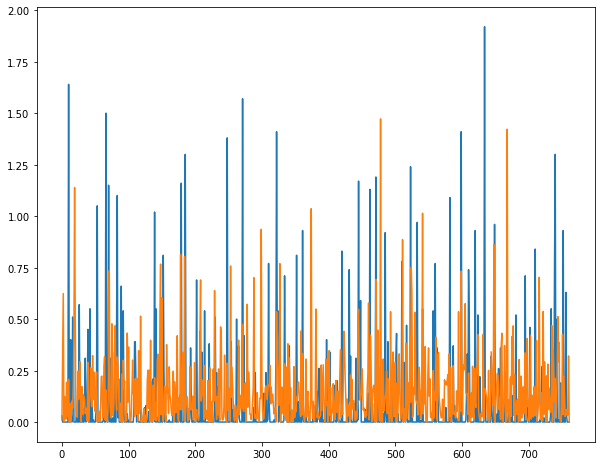

In [63]:
plt.plot(y_test)
plt.plot(yhat)
plt.gcf().set_size_inches(10,8)
plt.show()

**EVALUATION**

In [64]:
# Print results to evaluate model
print("Showing Performance Metrics for Random Forest Regression\n")

print ("Training Accuracy: {}".format(regressor.score(X_train, y_train)))
predicted = regressor.predict(X_test)

print("\n")

print("Cross Validation Accuracy: \n")
cv_accuracy = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10)
print("Accuracy using 10 folds: ")
print(cv_accuracy)

print("\n")

print("Mean accuracy: {}".format(cv_accuracy.mean()))
print("Standard Deviation: {}".format(cv_accuracy.std()))

Showing Performance Metrics for Random Forest Regression

Training Accuracy: 0.7878141455553527


Cross Validation Accuracy: 

Accuracy using 10 folds: 
[-0.10898573 -0.47432081 -0.42931586 -0.141889   -0.56237417 -0.10032065
 -0.00410654 -0.17798087 -0.11872278 -0.34103731]


Mean accuracy: -0.24590537274135804
Standard Deviation: 0.18028664104073164


**TEMPERATURE**

In [65]:
Xt = df.iloc[:, 2:5].values
yt = df.iloc[:, 1].values

In [66]:
print(Xt.shape, yt.shape) 

(3806, 3) (3806,)


In [67]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=0.2)

In [68]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(Xt_train, yt_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [69]:
tpred = regressor.predict(Xt_test)

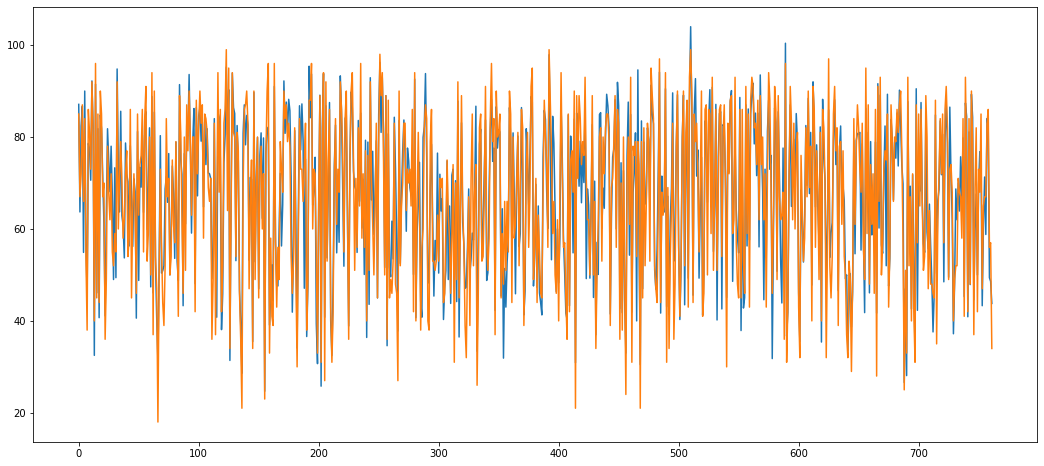

In [70]:
plt.plot(tpred)
plt.plot(yt_test)
plt.gcf().set_size_inches(18,8)
plt.show()

In [71]:
# Print results to evaluate model
print("Showing Performance Metrics for Random Forest Regression")

print ("Training Accuracy: {}".format(regressor.score(Xt_train, yt_train)))
predicted = regressor.predict(Xt_test)

print("\n")

print("Cross Validation Accuracy: \n")
cv_accuracy = cross_val_score(estimator=regressor, X=Xt_train, y=yt_train, cv=10)
print("Accuracy using 10 folds: ")
print(cv_accuracy)

print("\n")

print("Mean accuracy: {}".format(cv_accuracy.mean()))
print("Standard Deviation: {}".format(cv_accuracy.std()))

Showing Performance Metrics for Random Forest Regression
Training Accuracy: 0.969260467148262


Cross Validation Accuracy: 

Accuracy using 10 folds: 
[0.77036689 0.83302959 0.83783536 0.8481704  0.76991254 0.81804141
 0.83816642 0.8376915  0.78524169 0.81658928]


Mean accuracy: 0.8155045067602413
Standard Deviation: 0.028139232659324883


**WITHOUT USING TEMPERATURE TO PREDICT PRECIPITATION**

In [72]:
Xw = df.iloc[:, 2:5].values
yw = df.iloc[:, 0].values

In [73]:
print(Xw.shape, yw.shape) 

(3806, 3) (3806,)


In [74]:
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.2)

In [75]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(Xw_train, yw_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [76]:
ywhat = regressor.predict(Xw_test)

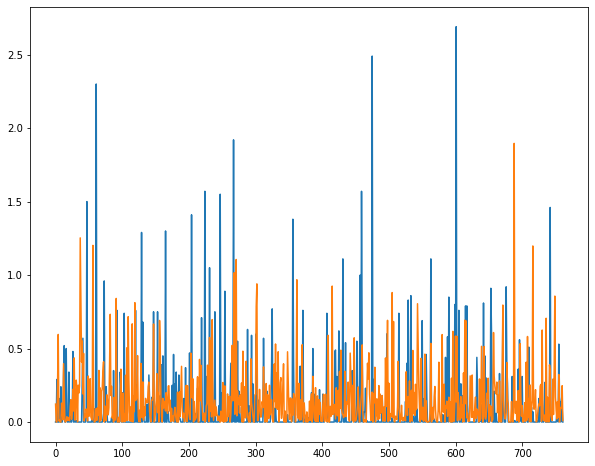

In [77]:
plt.plot(yw_test)
plt.plot(ywhat)
plt.gcf().set_size_inches(10,8)
plt.show()

In [78]:
# Print results to evaluate model
print("Showing Performance Metrics for Random Forest Regression")

print ("Training Accuracy: {}".format(regressor.score(Xw_train, yw_train)))
predicted = regressor.predict(Xw_test)

print("\n")

print("Cross Validation Accuracy: \n")
cv_accuracy = cross_val_score(estimator=regressor, X=Xw_train, y=yw_train, cv=10)
print("Accuracy using 10 folds: ")
print(cv_accuracy)

print("\n")

print("Mean accuracy: {}".format(cv_accuracy.mean()))
print("Standard Deviation: {}".format(cv_accuracy.std()))

Showing Performance Metrics for Random Forest Regression
Training Accuracy: 0.7504033855114063


Cross Validation Accuracy: 

Accuracy using 10 folds: 
[-0.17331215 -0.53744716 -0.25139653 -0.15324449 -0.39303231 -0.38221496
 -0.08794339 -0.21323337 -0.34392501 -0.33052602]


Mean accuracy: -0.2866275408392642
Standard Deviation: 0.1285745799971385
